In [131]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

In [132]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

In [133]:
# train_X = train_X.astype("float64")
# train_y = train_y.astype("float64")
# test_X = test_X.astype("float64")
# test_y = test_X.astype("float64")

In [134]:
test_X = test_X/255
train_X = train_X/255

In [135]:
train_X.shape, train_y.shape

((60000, 28, 28), (60000,))

In [136]:
train_X.T[0]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [137]:
def get_one_hot_y(y):
    output = []
    for i in range(y.shape[0]):
        tmp = np.array([0]*10)
        tmp[train_y[i]] = 1
        output.append(tmp)
    return np.array(output).T

def get_flatten_X(X):
    output = []
    for i in range(X.shape[0]):
        output.append(X[i].flatten())
    return np.array(output).T

In [138]:
train_y_onehot = get_one_hot_y(train_y)
train_X_flatten = get_flatten_X(train_X)
test_y_onehot = get_one_hot_y(test_y)
test_X_flatten = get_flatten_X(test_X)

In [139]:
train_y_onehot.shape, test_y_onehot.shape

((10, 60000), (10, 10000))

In [140]:
train_X_flatten.shape, test_X_flatten.shape

((784, 60000), (784, 10000))

Label: 4
Y onehot: [0 0 0 0 1 0 0 0 0 0]


<Figure size 432x288 with 0 Axes>

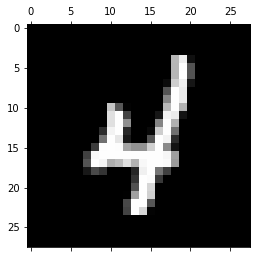

<Figure size 432x288 with 0 Axes>

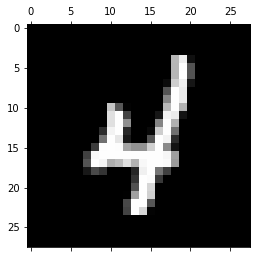

In [141]:
def plot_and_label_train_X(i):
    print("Label:", train_y[i])
    print("Y onehot:", train_y_onehot.T[i])
    plt.gray()
    plt.matshow(train_X[i])
    plt.show()

    p = np.reshape(train_X_flatten.T[i].T,(28,28))
    plt.gray()
    plt.matshow(p)
    plt.show()



plot_and_label_train_X(np.random.randint(0,1000))

In [142]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_deriv(x):
    return sigmoid(x)*(1-sigmoid(x))

def ReLU(Z):
    return np.maximum(Z, 0)

def ReLU_deriv(Z):
    return Z > 0

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A



In [143]:
# suppress warnings
#np.warnings.filterwarnings('ignore')


# init params
W1 = np.random.uniform(-0.5, 0.5, (10,784))
b1 = np.random.uniform(-0.5, 0.5, (10,1))
W2 = np.random.uniform(-0.5, 0.5, (10,10))
b2 = np.random.uniform(-0.5, 0.5, (10,1))

i = 0
m = 2

X = train_X_flatten.T[i:i+m].T # shape -> 784, m
Y = train_y_onehot.T[i:i+m].T

# forward prop
Z1 = W1@X+b1
A1 = ReLU(Z1)
Z2 = W2@A1+b2
A2 = softmax(Z2)

# backward prop
dZ2 = A2-Y
dW2 = 1/m*dZ2@A1.T
db2 = 1/m*np.sum(dZ2)
dZ1 = W2.T@dZ2 * ReLU_deriv(Z1)
dW1 = 1/m*dZ1@X.T
db1 = 1/m*np.sum(dZ1)

# update poram
learning_rate = 0.2
W1 = W1 - learning_rate * dW1
b1 = b1 - learning_rate * db1    
W2 = W2 - learning_rate * dW2  
b2 = b2 - learning_rate * db2    

In [144]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    # print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

In [145]:
print(train_y.shape ,train_y_onehot.shape, train_X_flatten.shape)

(60000,) (10, 60000) (784, 60000)


In [157]:
W1 = np.random.uniform(-0.5, 0.5, (10,784))
b1 = np.random.uniform(-0.5, 0.5, (10,1))
W2 = np.random.uniform(-0.5, 0.5, (10,10))
b2 = np.random.uniform(-0.5, 0.5, (10,1))


learning_rate = 0.1
iterations = 500

X = train_X_flatten # shape -> 784, m
Y = train_y_onehot
m = 60000

correct_predictions = 0
wrong_predictions = 0

for iter in range(iterations):
    # forward prop
    Z1 = W1@X+b1
    A1 = ReLU(Z1)
    Z2 = W2@A1+b2
    A2 = softmax(Z2)

    # backward prop
    dZ2 = A2-Y
    dW2 = 1/m*dZ2@A1.T
    db2 = 1/m*np.sum(dZ2)
    dZ1 = W2.T@dZ2 * ReLU_deriv(Z1)
    dW1 = 1/m*dZ1@X.T
    db1 = 1/m*np.sum(dZ1)

    # update poram
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1    
    W2 = W2 - learning_rate * dW2  
    b2 = b2 - learning_rate * db2    

    # accuracy
    if iter % 10 == 0 :
        # print(A2)
        print("Iteration: ", iter)
        predictions = get_predictions(A2)
        print(get_accuracy(predictions, train_y))


Iteration:  0
0.11446666666666666
Iteration:  10
0.12996666666666667
Iteration:  20
0.15218333333333334
Iteration:  30
0.19753333333333334
Iteration:  40
0.23913333333333334
Iteration:  50
0.27868333333333334
Iteration:  60
0.31953333333333334
Iteration:  70
0.3806
Iteration:  80
0.43755
Iteration:  90
0.4875333333333333
Iteration:  100
0.5331833333333333
Iteration:  110
0.5715833333333333
Iteration:  120
0.6046666666666667
Iteration:  130
0.6345666666666666
Iteration:  140
0.6604
Iteration:  150
0.6826666666666666
Iteration:  160
0.7007166666666667
Iteration:  170
0.7159166666666666
Iteration:  180
0.72935
Iteration:  190
0.7409833333333333
Iteration:  200
0.7503
Iteration:  210
0.7593333333333333
Iteration:  220
0.7664333333333333
Iteration:  230
0.7730833333333333
Iteration:  240
0.7788333333333334
Iteration:  250
0.7840333333333334
Iteration:  260
0.7889333333333334
Iteration:  270
0.7939333333333334
Iteration:  280
0.7979666666666667
Iteration:  290
0.8015166666666667
Iteration:  

In [147]:
train_X_flatten.T[0:1].T.shape

(784, 1)

In [154]:
index = 5151
#plot_and_label_train_X(index)

X = train_X_flatten.T[index:index+1].T
y = train_y_onehot.T[index:index+1].T


Z1 = W1@X+b1
A1 = ReLU(Z1)
Z2 = W2@A1+b2
A2 = softmax(Z2)

# print(Z1.shape, W1.shape, X.shape) # -> HOW????
print(np.argmax(A2), np.argmax(y))


2 2


In [149]:
W1 = np.random.uniform(-0.5, 0.5, (10,784))
b1 = np.random.uniform(-0.5, 0.5, (10,1))
W2 = np.random.uniform(-0.5, 0.5, (10,10))
b2 = np.random.uniform(-0.5, 0.5, (10,1))

learning_rate = 0.05
iterations = 100

correct_predictions = 0
wrong_predictions = 0
   
for _ in range(iterations):
    i = 0
    m = 20000

    while i<train_X_flatten.shape[-1]:
        X = train_X_flatten.T[i:i+m].T # shape -> 784, m
        Y = train_y_onehot.T[i:i+m].T

        # forward prop
        Z1 = W1@X+b1
        A1 = ReLU(Z1)
        Z2 = W2@A1+b2
        A2 = softmax(Z2)

        # backward prop
        dZ2 = A2-Y
        for i_ in range(m):
            guess = np.argmax(A2.T[i_])
            label = np.argmax(Y.T[i_])
            if label == guess:
                correct_predictions += 1
            else:
                wrong_predictions += 1
            
        dW2 = 1/m*dZ2@A1.T
        db2 = 1/m*np.sum(dZ2)
        dZ1 = W2.T@dZ2 * ReLU_deriv(Z1)
        dW1 = 1/m*dZ1@X.T
        db1 = 1/m*np.sum(dZ1)

        # update poram
        W1 = W1 - learning_rate * dW1
        b1 = b1 - learning_rate * db1    
        W2 = W2 - learning_rate * dW2  
        b2 = b2 - learning_rate * db2    
        i+=m

print("Correct guesses: ", correct_predictions)
print("Wrong guesses: ", wrong_predictions)
print("accuracy: ", correct_predictions/(wrong_predictions+correct_predictions))




KeyboardInterrupt: 

In [ ]:
index = np.random.randint(0,1000)
plot_and_label_train_X(index)

X = train_X_flatten.T[index:index+1].T # shape -> 784, m
Y = train_y_onehot.T[index:index+1].T

#print(X.shape)
Z1 = W1@X+b1
A1 = ReLU(Z1)
Z2 = W2@A1+b2
A2 = ReLU(Z2)
print(A2.T[0])
print("guess: ", np.argmax(A2.T[0]), "| certainty: " ,np.max(A2.T[0]) )
